<a href="https://colab.research.google.com/github/Katsushi-Nakanishi/quant-macro/blob/main/AssetFunction_gridsearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# 効用関数を定義
def util(cons, gamma):
    return max(cons, 1e-4) ** (1.0-gamma) / (1.0-gamma)

# cos > 0 が必ず成り立たなければならない⇒1e-4とのmaxをとる

In [44]:
a_l = 0.025 # aの最小値
a_u = 1.0-0.025 # aの最大値   ←　後でいじれるように最初に書いておく。
NA = 40 # グリッド数

w_l = 0.1
w_u = 1.0
NW = 10

w = np.linspace(w_l, w_u, NW)
a = np.linspace(a_l, a_u, NA) # [0.025, 1.0]の範囲で40個のグリッドを作成
gamma = 2.0
beta = 0.985 ** 30
r = 1.025 ** 30 - 1.0

# range(1,5) = 1,2,3,4
# range(5) = range(0,5) = 0,1,2,3,4

# wの値に応じて変わるaに関する入れ物を用意
iaplus = np.zeros(NW, dtype=int) # 整数であることを明示
aplus = np.zeros(NW)

for iw in range(NW):
    reward = np.zeros(NA)  # 40個の1次元配列の入れものを用意
    for ia in range(NA):
        reward[ia] = util(w[iw]-a[ia], gamma) + beta*util((1.0+r)*a[ia], gamma)
    iaplus[iw] = np.argmax(reward) # 最大となる要素の番号を教えてくれる
    aplus[iw] = a[iaplus[iw]]

print(aplus)

[0.025      0.07371795 0.09807692 0.14679487 0.17115385 0.21987179
 0.24423077 0.29294872 0.31730769 0.36602564]


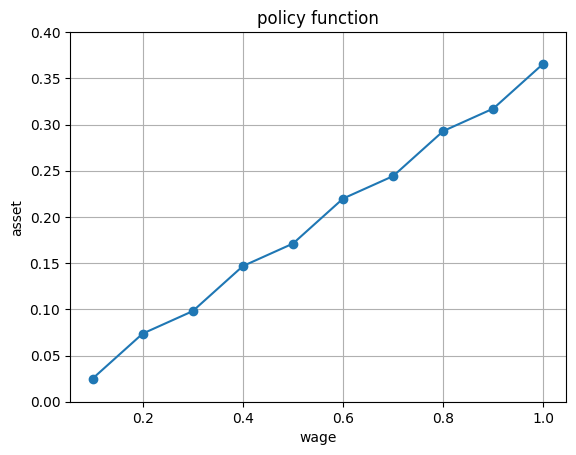

In [54]:
# 政策関数（貯蓄関数）の表示
plt.figure()
plt.plot(w, aplus, marker='o') # 各wに対する最適なasset
plt.title("policy function")
plt.xlabel("wage")
plt.ylabel("asset")
plt.ylim(0,0.4) # y軸の表示範囲
plt.grid(True)
plt.show()

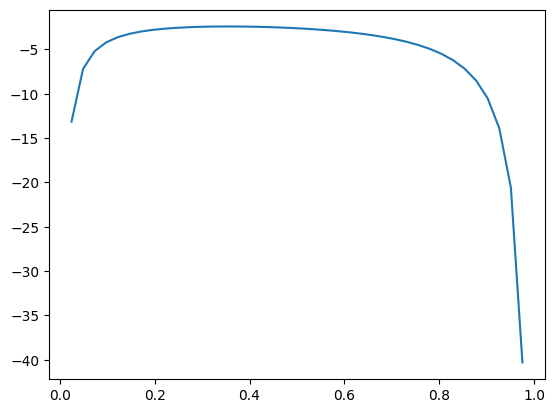

In [46]:
plt.plot(a, reward) # plot(x軸, y軸)でグラフを生成